# Import Relevant Modules

In [ ]:
!pip install astroquery

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
from astroquery.sdss import SDSS
from sklearn.preprocessing import LabelEncoder

# Load the Dataset

In [3]:
query = """
SELECT TOP 50000
  p.u, p.g, p.r, p.i, p.z, s.class, s.z, s.zerr
FROM PhotoObj AS p
  JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE
  p.u BETWEEN 0 AND 19.6
  AND p.g BETWEEN 0 AND 20
  AND s.class <> 'UNKNOWN'
  AND s.class <> 'SKY'
"""
result = SDSS.query_sql(query)
data = result.to_pandas()
df = pd.DataFrame(data)

df = df[df['zerr'] != -1.0]
df = df[df['zerr'] < 0.01]

df['u-g'] = df['u'] - df['g']
df['g-r'] = df['g'] - df['r']
df['r-i'] = df['r'] - df['i']
df['i-z'] = df['i'] - df['z']

# Encode the 'class' feature to integers
label_encoder = LabelEncoder()
df['class_encoded'] = label_encoder.fit_transform(df['class'])

df.reindex(np.random.permutation(df.index)).head()


,u,g,r,i,z,class,z1,zerr,u-g,g-r,r-i,i-z,class_encoded
12575,19.44466,17.75640,17.02028,16.70027,16.53262,STAR,-0.000378,0.000007,1.68826,0.73612,0.32001,0.16765,2
37497,19.12204,18.96618,18.88944,18.72921,18.71749,QSO,1.583912,0.000517,0.15586,0.07674,0.16023,0.01172,1
42778,19.36937,17.74858,16.87564,16.40016,15.99733,GALAXY,0.126935,0.000018,1.62079,0.87294,0.47548,0.40283,0
37531,18.38751,17.47655,17.09279,16.92846,16.85217,STAR,-0.000803,0.000010,0.91096,0.38376,0.16433,0.07629,2
30579,18.77725,17.65596,17.22492,16.91676,16.82879,GALAXY,0.074301,0.000007,1.12129,0.43104,0.30816,0.08797,0


# Look for missing/zero values

In [4]:
zero_percentage = (df == 0).mean() * 100
print("Percentage of zeroes in each column:")
print(zero_percentage)
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of zeroes in each column:
u                 0.000000
g                 0.000000
r                 0.000000
i                 0.000000
z                 0.000000
class             0.000000
z1                0.416533
zerr              0.416533
u-g               0.000000
g-r               0.000000
r-i               0.004005
i-z               0.000000
class_encoded    51.357738
dtype: float64
Percentage of missing values in each column:
u                0.0
g                0.0
r                0.0
i                0.0
z                0.0
class            0.0
z1               0.0
zerr             0.0
u-g              0.0
g-r              0.0
r-i              0.0
i-z              0.0
class_encoded    0.0
dtype: float64


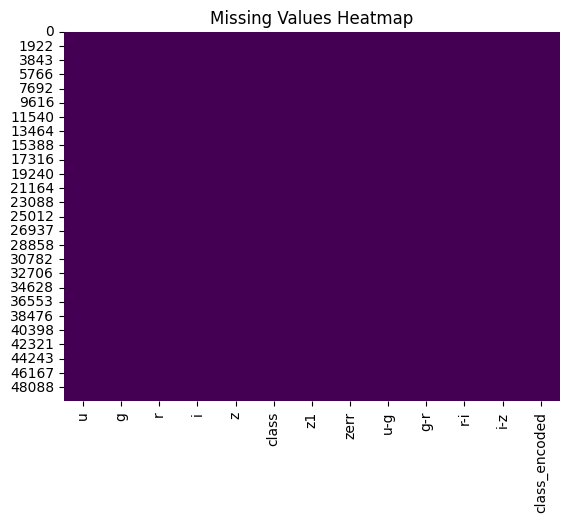

In [5]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Visualize Data

In [6]:
df.describe()

,u,g,r,i,z,z1,zerr,u-g,g-r,r-i,i-z,class_encoded
count,49936.000000,49936.000000,49936.000000,49936.000000,49936.000000,49936.000000,49936.000000,49936.000000,49936.000000,49936.000000,49936.000000,49936.000000
mean,18.613015,17.346402,16.818299,16.562218,16.400818,0.137356,0.000035,1.266613,0.528103,0.256082,0.161400,0.890280
std,0.847273,0.985735,1.128051,1.204931,1.289355,0.384801,0.000096,0.527941,0.361061,0.276880,0.312905,0.951532
min,11.624860,10.179370,8.870382,8.142487,8.406283,-0.004022,0.000000,-2.603700,-10.912080,-13.969430,-16.641130,0.000000
25%,18.158750,16.779600,16.139682,15.809465,15.560470,-0.000111,0.000009,1.024440,0.331457,0.146528,0.053830,0.000000
50%,18.850745,17.462725,16.839390,16.554350,16.374620,0.037787,0.000012,1.267680,0.551020,0.288490,0.162610,0.000000
75%,19.269573,18.010533,17.527103,17.283262,17.162025,0.087291,0.000018,1.607172,0.779315,0.408100,0.293063,2.000000
max,19.599980,19.991480,30.757110,31.468180,30.846780,6.991177,0.003828,6.028620,4.133860,10.570960,14.120050,2.000000


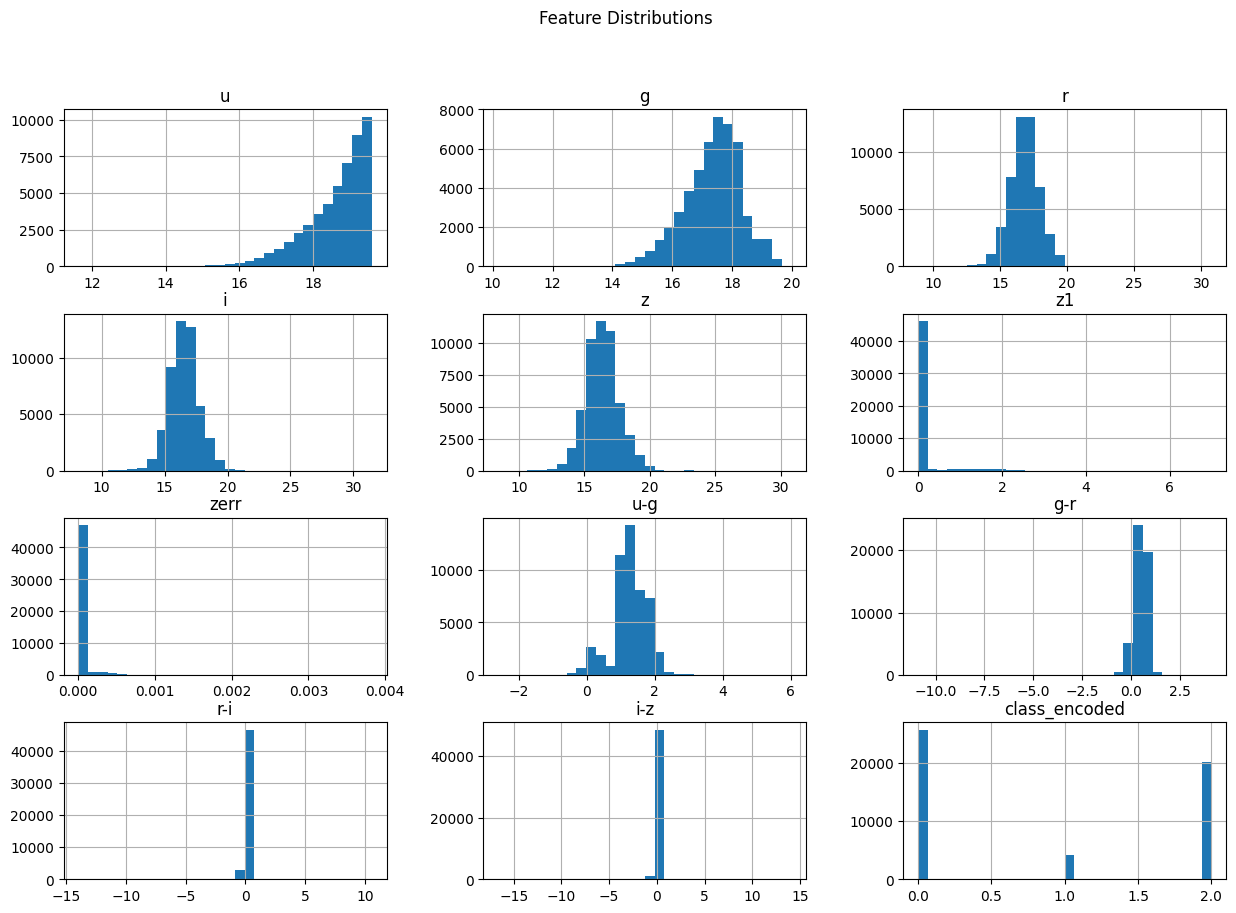

In [7]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

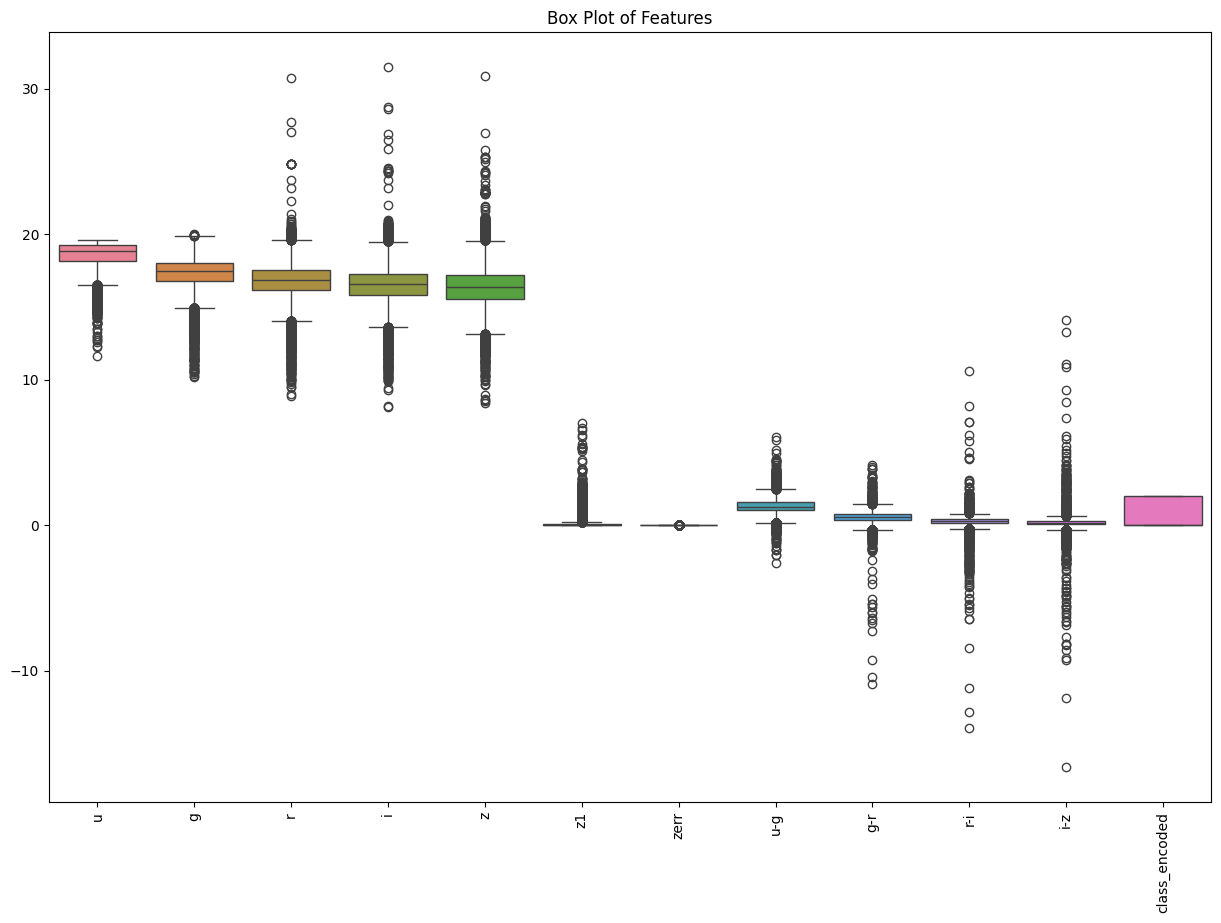

In [8]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Box Plot of Features')
plt.xticks(rotation=90)
plt.show()

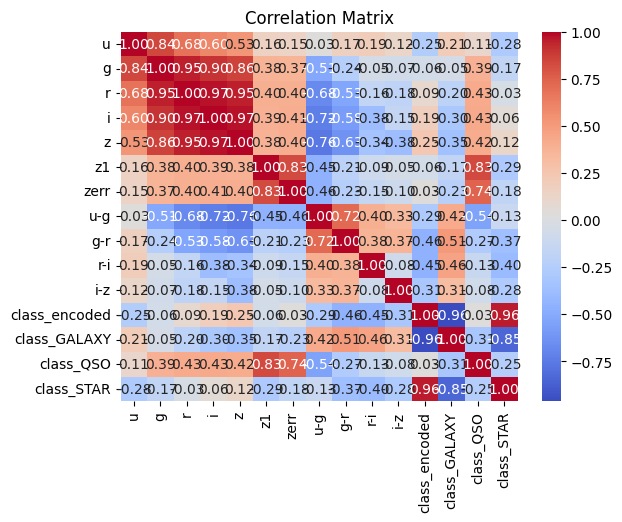

In [9]:
# Exclude non-numeric columns
data_encoded = pd.get_dummies(df, columns=['class'])

# Create the correlation matrix heatmap
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

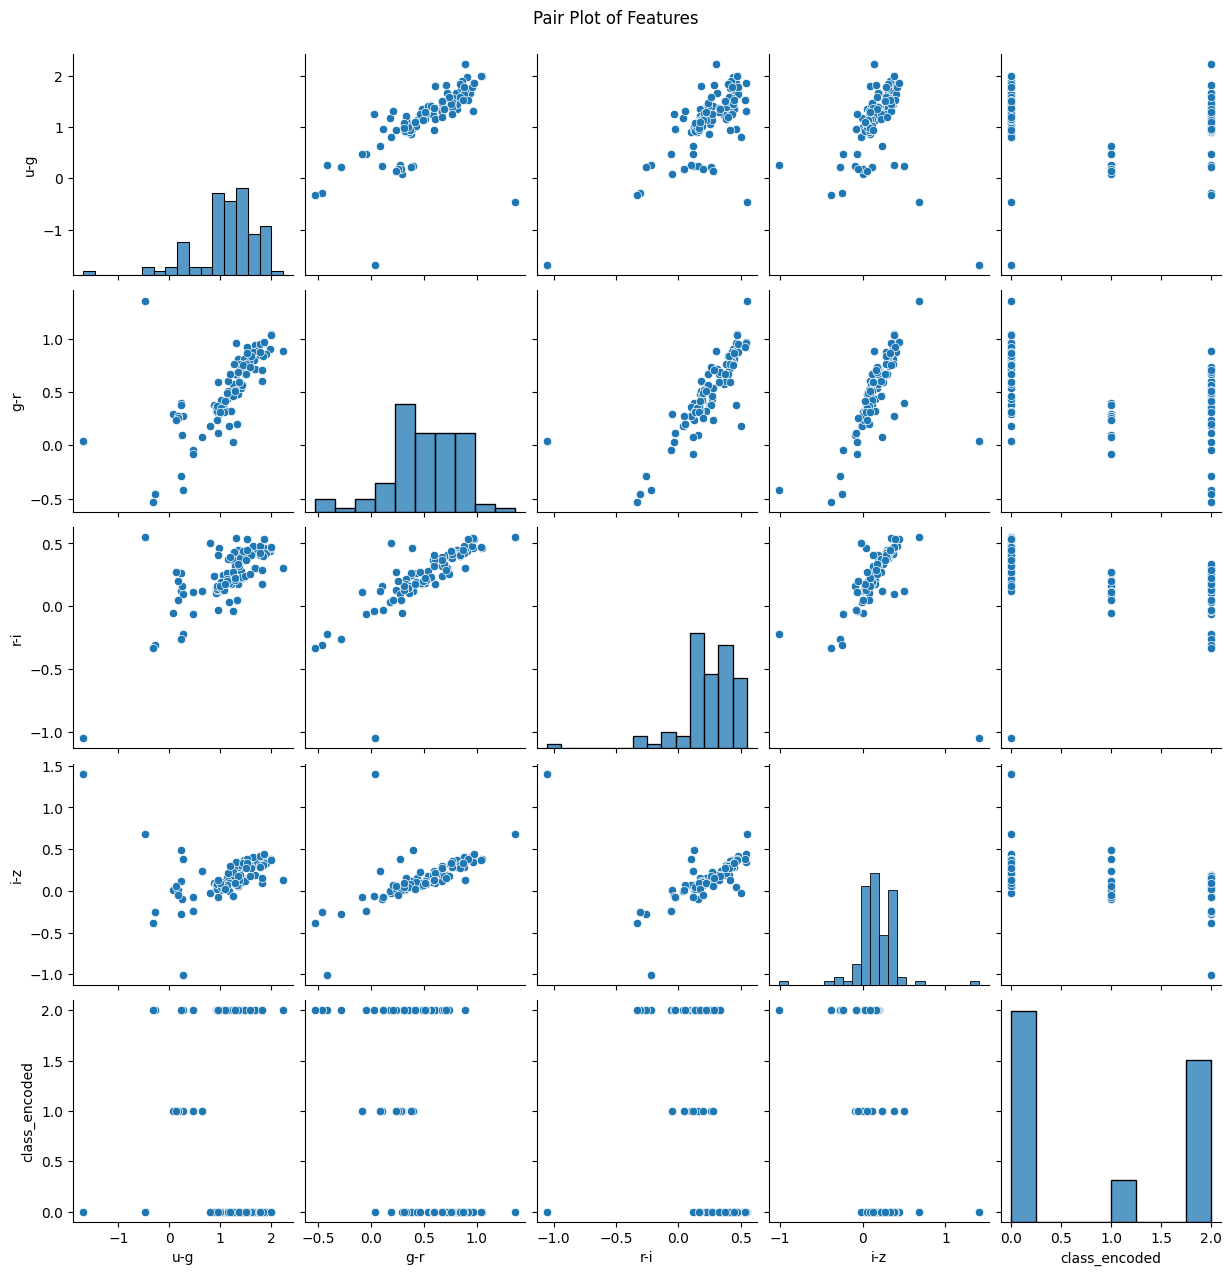

In [10]:
# Sample a subset of the data
sampled_data = data_encoded.sample(n=100, random_state=42)

# Create the pair plot with the sampled data
sns.pairplot(sampled_data[['u-g', 'g-r', 'r-i', 'i-z', 'class_encoded']])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

# Create train/test split

In [11]:
df = df.reindex(np.random.permutation(df.index))
training_set = df.iloc[:(8*len(df)//10)]
test_set = df.iloc[(8*len(df)//10):]

# Represent Data/Create Preprocessing Layers

In [12]:
inputs = {
    'u':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='u'),
    'g':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='g'),
    'r':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='r'),
    'i':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='i'),
    'z':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='z'),
    'z1':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='z1'),
    'u-g':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='u-g'),
    'g-r':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='g-r'),
    'r-i':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='r-i'),
    'i-z':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='i-z'),
}

preprocessing_layers = tf.keras.layers.Concatenate()([
    inputs.get('u'),
    inputs.get('g'),
    inputs.get('r'),
    inputs.get('i'),
    inputs.get('z'),
    inputs.get('z1'),
    inputs.get('u-g'),
    inputs.get('g-r'),
    inputs.get('r-i'),
    inputs.get('i-z')
])

# Define functions to create and train a linear regression model

In [13]:

def create_model(my_inputs, my_outputs, my_learning_rate):
  """Create and compile a simple linear regression model."""
  model = tf.keras.Model(inputs=my_inputs, outputs=my_outputs)

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.Adam(
      learning_rate=my_learning_rate),
      loss="sparse_categorical_crossentropy",
      metrics=['accuracy'])

  return model


def train_model(model, dataset, epochs, batch_size, label_name, validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, validation_split=validation_split)

  # Get details that will be useful for plotting the loss curve.
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


# Define a deep neural net model

In [14]:
def get_outputs_dnn():
  dense_output = tf.keras.layers.Dense(units=256,
                              activation='relu',
                              name='hidden_dense_layer_1')(preprocessing_layers)

  dense_output = tf.keras.layers.Dense(units=128,
                              activation='relu',
                              name='hidden_dense_layer_2')(dense_output)

  dense_output = tf.keras.layers.Dropout(rate=0.2)(dense_output)

  # Create the Dense output layer.
  dense_output = tf.keras.layers.Dense(units=3, activation='softmax')(dense_output)

  # Define an output dictionary we'll send to the model constructor.
  outputs = {
    'dense_output': dense_output
  }

  return outputs

# Define the plotting function

In [15]:
#@title Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


# Call the functions to build and train a deep neural net

Epoch 1/50
11/11 [==============================] - 1s 46ms/step - loss: 2.0451 - accuracy: 0.4491 - val_loss: 0.8334 - val_accuracy: 0.6363
Epoch 2/50
11/11 [==============================] - 0s 27ms/step - loss: 1.0244 - accuracy: 0.5170 - val_loss: 0.8788 - val_accuracy: 0.5404
Epoch 3/50
11/11 [==============================] - 0s 25ms/step - loss: 0.8184 - accuracy: 0.6009 - val_loss: 0.7402 - val_accuracy: 0.5743
Epoch 4/50
11/11 [==============================] - 0s 30ms/step - loss: 0.7219 - accuracy: 0.6647 - val_loss: 0.6766 - val_accuracy: 0.7360
Epoch 5/50
11/11 [==============================] - 0s 31ms/step - loss: 0.6587 - accuracy: 0.7196 - val_loss: 0.6301 - val_accuracy: 0.7466
Epoch 6/50
11/11 [==============================] - 0s 25ms/step - loss: 0.6114 - accuracy: 0.7454 - val_loss: 0.5836 - val_accuracy: 0.7569
Epoch 7/50
11/11 [==============================] - 0s 25ms/step - loss: 0.5686 - accuracy: 0.7672 - val_loss: 0.5452 - val_accuracy: 0.7723
Epoch 8/50
11

{'loss': 0.10937292128801346, 'accuracy': 0.9709651470184326}

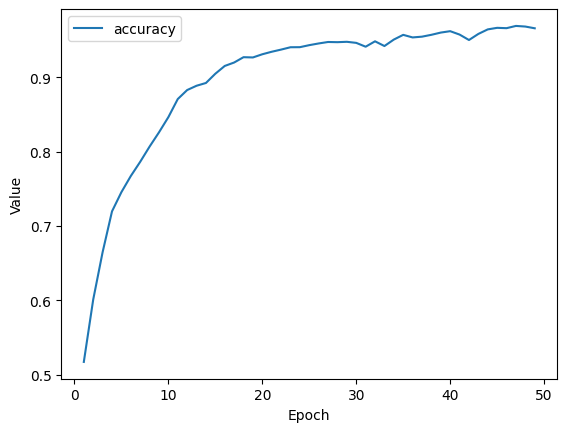

In [22]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 3000

# Specify the label
label_name = "class_encoded"

# Split the original training set into a reduced training set and a
# validation set.
validation_split = 0.2

dnn_outputs = get_outputs_dnn()

# Establish the model's topography.
my_model = create_model(
    inputs,
    dnn_outputs,
    learning_rate)

# Train the model on the training set.
epochs, history = train_model(my_model, training_set, epochs,
                                   batch_size, label_name, validation_split)

list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, history, list_of_metrics_to_plot)

# After building a model against the training set, test that model
# against the test set.
test_features = {name:np.array(value) for name, value in test_set.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size, return_dict=True)

# Predictions

In [23]:
sample = {name:np.array(value) for name, value in test_set.iloc[31:32].items()}
sample.pop('class')
sample.pop('zerr')
sample.pop('class_encoded')

prediction = my_model.predict(sample)
max_index = np.argmax(prediction['dense_output'])
prediction_name = label_encoder.classes_[max_index]
print(f"Prediction: {prediction_name}")

print("Actual: ", test_set.iloc[31:32]['class'])

1/1 [==============================] - 0s 112ms/step
Prediction: GALAXY
Actual:  15298    GALAXY
Name: class, dtype: object


# Learn about the trained model

In [24]:
def model_predict(data):
    data_df = pd.DataFrame(data, columns=x_train.columns)
    data_dict = {name:np.array(value) for name, value in data_df.items()}
    predictionFuncRes = my_model.predict(data_dict)
    return predictionFuncRes['dense_output']

In [ ]:
!pip install shap
import shap

In [ ]:
def custom_masker(mask, x):
    return (x * mask).reshape(1, len(x))

x_train = training_set.drop(columns=['class', 'class_encoded', 'zerr'])
x_test = test_set.drop(columns=['class', 'class_encoded', 'zerr'])

explainer = shap.Explainer(model_predict, masker=custom_masker)

x_test_sample = shap.sample(x_test, 100)

shap_values = explainer(x_test_sample)

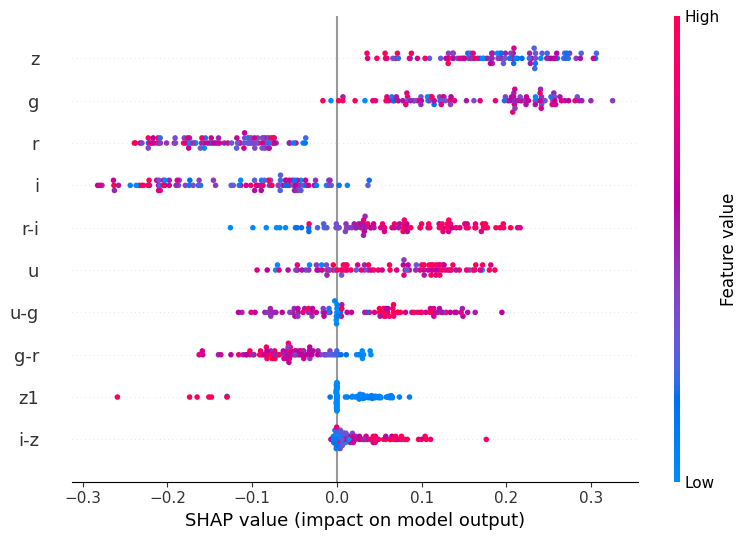

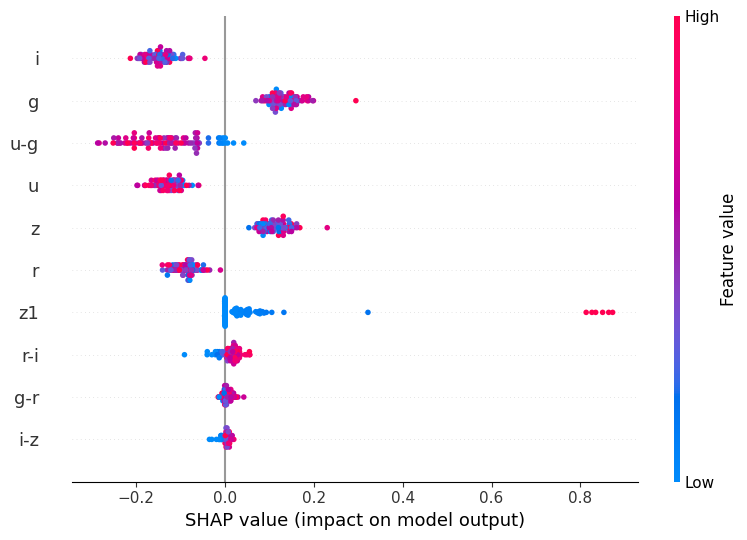

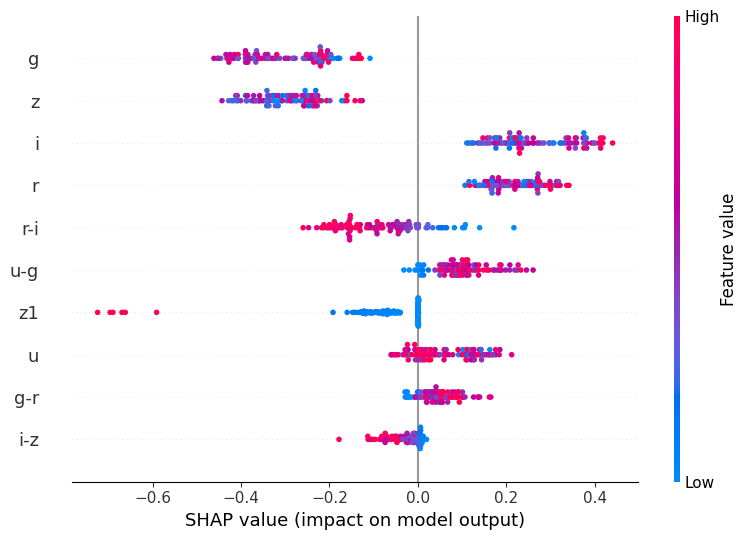

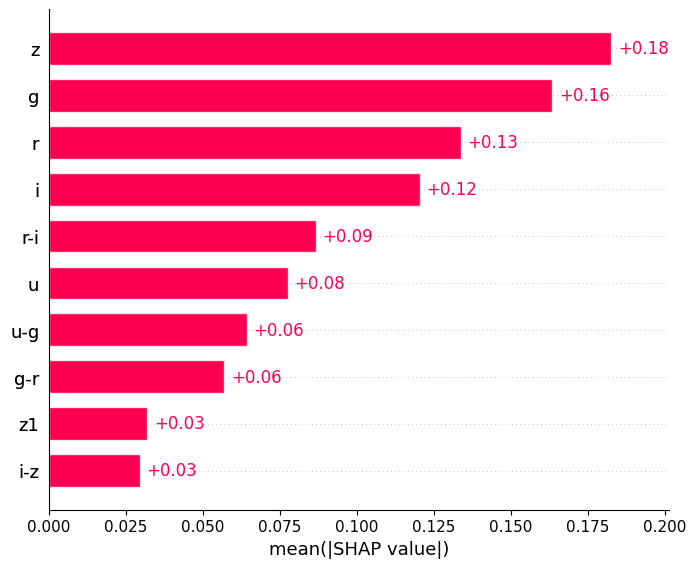

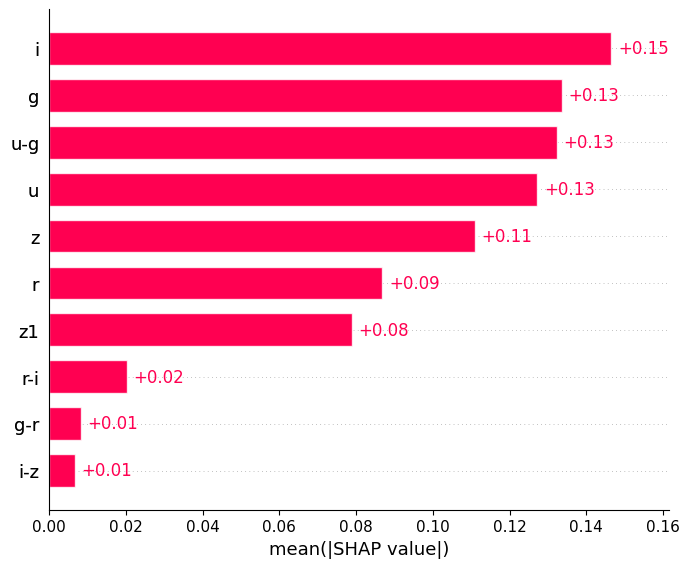

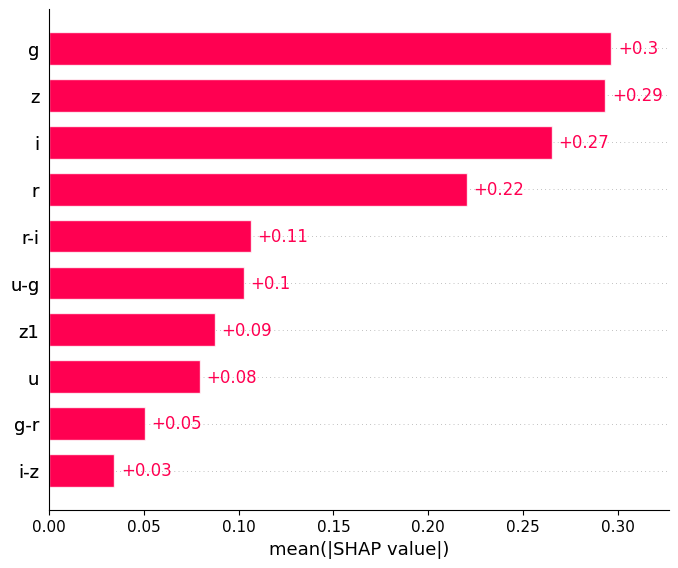

In [27]:
shap.summary_plot(shap_values.values[:,:,0], x_test_sample)
shap.summary_plot(shap_values.values[:,:,1], x_test_sample)
shap.summary_plot(shap_values.values[:,:,2], x_test_sample)

shap.plots.bar(shap_values[:,:,0])
shap.plots.bar(shap_values[:,:,1])
shap.plots.bar(shap_values[:,:,2])

# Loading my trained model
### I have used this notebook to train a model with ~97% accuracy and 0.11 loss. The following code will be for you to load in the model I trained, along with SHAP values calculated with that model, and the dataset compiled into a .csv.

In [ ]:
#@title Load trained model
# !unzip my_model.zip -d my_model
# model = tf.keras.saving.load_model('my_model')

In [ ]:
#@title Load SHAP values derived from loaded model
# loaded_shap_values = np.load('shap_values.npy')

In [ ]:
#@title Load data from csv
# loaded_training_set = pd.read_csv('trainingset.csv')
# loaded_test_set = pd.read_csv('testset.csv')

In [ ]:
#@title Example prediction
# sample = {name:np.array(value) for name, value in loaded_test_set.iloc[31:32].items()}
# sample.pop('class')
# sample.pop('zerr')
# sample.pop('class_encoded')

# prediction = model.predict(sample)
# max_index = np.argmax(prediction['dense_output'])
# prediction_name = ['GALAXY', 'QSO', 'STAR'][max_index]
# print(f"Prediction: {prediction_name}")
# print("Actual: ", loaded_test_set.iloc[31:32]['class'])